In [1]:
import os
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision import datasets
from torchvision.utils import make_grid
from torch.utils.data import random_split
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset_path = '/content/drive/MyDrive/Derm_2_classes'
print('Types/Class of Diseases in the data-set :')
os.listdir(dataset_path+'/train')

Types/Class of Diseases in the data-set :


['Psoriasis', 'Melanoma Skin Cancer Nevi and Moles']

In [5]:
Psoriasis_train_files = os.listdir(dataset_path+'/train'+"/Psoriasis")
Psoriasis_valid_files = os.listdir(dataset_path+'/validation'+"/Psoriasis")
print('\nNo. of training set samples for Psoriasis pictures  : ', len(Psoriasis_train_files))
print('No. of validation set samples for Psoriasis pictures  : ', len(Psoriasis_valid_files))
print(Psoriasis_train_files[:40])

Melanoma_Skin_Cancer_Nevi_Moles_train_files = os.listdir(dataset_path+'/train'+"/Melanoma Skin Cancer Nevi and Moles")
Melanoma_Skin_Cancer_Nevi_Moles_valid_files = os.listdir(dataset_path+'/validation'+"/Melanoma Skin Cancer Nevi and Moles")
print('\nNo. of training set samples for Melanoma Skin Cancer Nevi and Moles : ', len(Melanoma_Skin_Cancer_Nevi_Moles_train_files))
print('No. of validation set samples for Melanoma Skin Cancer Nevi and Moles : ', len(Melanoma_Skin_Cancer_Nevi_Moles_valid_files))
print(Melanoma_Skin_Cancer_Nevi_Moles_train_files[:40])



No. of training set samples for Psoriasis pictures  :  475
No. of validation set samples for Psoriasis pictures  :  110
['08PsoriasisIntertrigo.jpg', '08psoriasisIntertrig020606.jpg', '08PsoriasisOilSpot.jpg', '08PsoriasisPustular.jpg', '08lichenPlanusTongue1122052.jpg', '08PsoriasisOnycholysis1.jpg', '08PsoriasisPitting.jpg', '08PsoriasisIntertrigo1006.jpg', '08PsoriasisPinking2.jpg', '08PsoriasisOnycholysis.jpg', '08PsoriasisOnycholysis2.jpg', '08PsoriasisGroin.jpg', '08psoriasisIntertrig0206061.jpg', '08PsoriasisUmbilicus.jpg', '08PsoriasisPitting1.jpg', '08PsoriasisGroin1.jpg', '08PsoriasisNailSkin.jpg', 'Psoriasis-Cellulitis-1.jpg', 'Psoriasis-Chronic-Plaque-100.jpg', 'Psoriasis-Anus-3.jpg', 'Psoriasis-Anus-13.jpg', 'Psoriasis-Chronic-Plaque-102.jpg', 'Psoriasis-Chronic-Plaque-104.jpg', 'Psoriasis-Chronic-Plaque-109.jpg', 'Psoriasis-Anus-9.jpg', 'Psoriasis-Anus-8.jpg', 'Psoriasis-Anus-11.jpg', 'Psoriasis-Anus-10.jpg', 'Psoriasis-Anus-14.jpg', 'Psoriasis-Chronic-Plaque-107.jpg', '

In [6]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
train_dataset =ImageFolder(dataset_path+'/train', transform=ToTensor())
validation_dataset = ImageFolder(dataset_path+'/validation', transform=ToTensor())
test_dataset = ImageFolder(dataset_path+'/test', transform=ToTensor())

In [7]:
Classes = train_dataset.classes
# Number of Images for each class
for i in Classes:
  train_images = os.listdir(dataset_path+'/train/' + i)
  img_count = len(train_images)
  print("Class [{}] has {} images".format(i, img_count))

Class [Melanoma Skin Cancer Nevi and Moles] has 463 images
Class [Psoriasis] has 475 images


In [8]:
print("Total number of classes or types of diseases in the dataset : ",len(train_dataset.classes))

Total number of classes or types of diseases in the dataset :  2


In [9]:
print("Size of training set : ",len(train_dataset))
print("Size of Validation set : ",len(validation_dataset))

Size of training set :  938
Size of Validation set :  221


In [10]:
img, label = train_dataset[0]
print(img.shape, label)
img

torch.Size([3, 489, 720]) 0


tensor([[[0.1569, 0.1490, 0.1647,  ..., 0.3294, 0.1451, 0.1294],
         [0.1922, 0.1765, 0.1922,  ..., 0.2314, 0.2235, 0.2471],
         [0.1843, 0.1725, 0.1882,  ..., 0.1255, 0.1686, 0.2118],
         ...,
         [0.7333, 0.6392, 0.5961,  ..., 0.5961, 0.6000, 0.6196],
         [0.7725, 0.6824, 0.6235,  ..., 0.5882, 0.6471, 0.6941],
         [0.6588, 0.7059, 0.7255,  ..., 0.6353, 0.6157, 0.6000]],

        [[0.1922, 0.1843, 0.2000,  ..., 0.3686, 0.1961, 0.1804],
         [0.2275, 0.2118, 0.2275,  ..., 0.2745, 0.2745, 0.2980],
         [0.2196, 0.2078, 0.2235,  ..., 0.1686, 0.2118, 0.2549],
         ...,
         [0.6863, 0.5922, 0.5412,  ..., 0.5412, 0.5490, 0.5686],
         [0.7255, 0.6275, 0.5686,  ..., 0.5333, 0.5961, 0.6431],
         [0.6118, 0.6510, 0.6706,  ..., 0.5804, 0.5647, 0.5490]],

        [[0.2118, 0.2039, 0.2196,  ..., 0.4039, 0.2275, 0.2118],
         [0.2471, 0.2314, 0.2471,  ..., 0.2980, 0.2980, 0.3216],
         [0.2392, 0.2275, 0.2431,  ..., 0.1843, 0.2275, 0.

### ***Visualising Data*** 

---



In [11]:
def show_sample(img, label):
    print('Label: ', train_dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  Melanoma Skin Cancer Nevi and Moles (0)


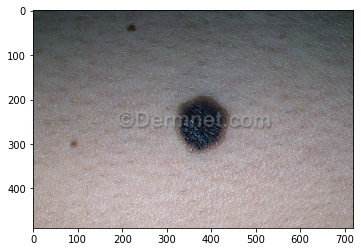

In [12]:
show_sample(*train_dataset[0])

Label:  Melanoma Skin Cancer Nevi and Moles (0)


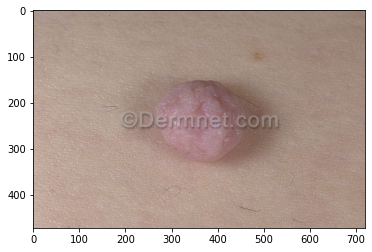

In [13]:
show_sample(*train_dataset[343])

Label:  Psoriasis (1)


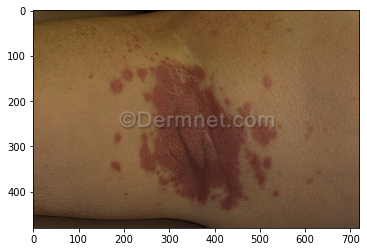

In [14]:
show_sample(*train_dataset[745])

Label:  Melanoma Skin Cancer Nevi and Moles (0)


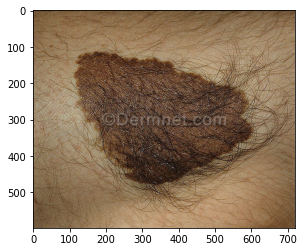

In [15]:
show_sample(*train_dataset[134])

Label:  Psoriasis (1)


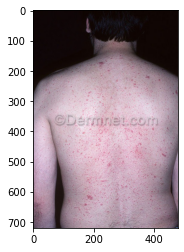

In [16]:
show_sample(*train_dataset[680])

### ***From the above sample images we can observe that our dataset does not contain equal size images. Therefore before training the model all images need to be resized.***

---



### **Normalization & Data augmentation :**

---



In [17]:
import torchvision.transforms as transforms
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
train_transforms = transforms.Compose([
                         transforms.Resize([32, 32]),
                         transforms.RandomCrop(32, padding=4, padding_mode='reflect'), 
                         transforms.RandomHorizontalFlip(), 
                         transforms.ToTensor(), 
                         transforms.Normalize(*stats,inplace=True)])
validation_transforms = transforms.Compose(
    [transforms.Resize([32,32]),
    transforms.ToTensor(), transforms.Normalize(*stats)])

In [18]:
train_ds = ImageFolder(dataset_path+'/train', train_transforms)
valid_ds = ImageFolder(dataset_path+'/validation', validation_transforms)
batch_size = 64

train_dl = torch.utils.data.DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = torch.utils.data.DataLoader(valid_ds, batch_size*2, num_workers=3, pin_memory=True)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Random batch of images from the dataset :



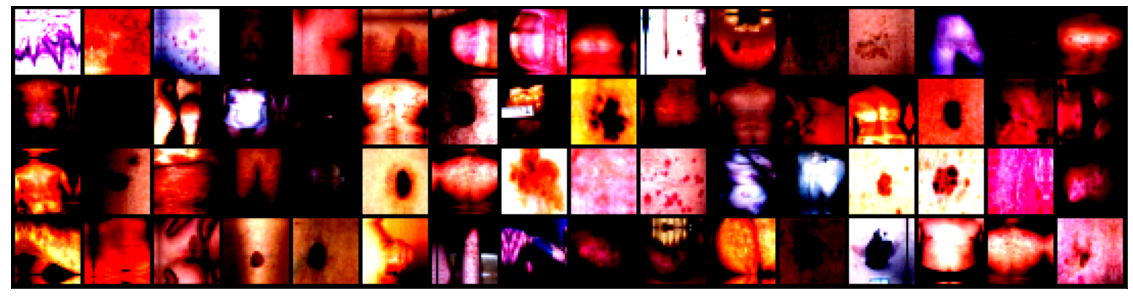

In [19]:
def show_batch(dl):
  for images, labels in dl:
        fig, ax = plt.subplots(figsize=(20,15))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break
print("Random batch of images from the dataset :\n")
show_batch(train_dl)

In [20]:
img, label = train_ds[125]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[ 1.3898,  1.6030,  1.5061,  ...,  0.1297,  0.3042,  0.3817],
         [ 1.4285,  1.5836,  1.5061,  ..., -0.0253,  0.2073,  0.2073],
         [ 1.3898,  1.6030,  1.5061,  ...,  0.1297,  0.3042,  0.3817],
         ...,
         [ 0.4981,  0.8082,  0.5368,  ..., -0.2386, -0.1029, -0.0060],
         [ 0.4011,  0.6531,  0.3236,  ..., -0.1610,  0.0328,  0.0328],
         [ 0.3817,  0.5174,  0.2654,  ..., -0.0060, -0.0060,  0.1297]],

        [[ 0.8268,  0.9841,  0.8268,  ..., -0.2549, -0.0189,  0.0204],
         [ 0.8464,  0.9841,  0.8661,  ..., -0.3926, -0.0582, -0.0976],
         [ 0.8268,  0.9841,  0.8268,  ..., -0.2549, -0.0189,  0.0204],
         ...,
         [ 0.1581,  0.5514,  0.2761,  ..., -0.6679, -0.5892, -0.4516],
         [ 0.0598,  0.3744,  0.0401,  ..., -0.6089, -0.4516, -0.4122],
         [ 0.0598,  0.2564, -0.0386,  ..., -0.4909, -0.4516, -0.3139]],

        [[ 0.9588,  1.1734,  1.0758,  ..., -0.1533,  0.0613,  0.1198],
         [ 1.0563,  1.2319,  1.1344,  ..., -0

### **Using a GPU**

---



In [21]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [22]:
device = get_default_device()
device

device(type='cuda')

In [23]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

In [24]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generating predictions
        loss = F.cross_entropy(out, labels) # Calculating cross entropy loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                   
        loss = F.cross_entropy(out, labels)  
        acc = accuracy(out, labels)           
        return {'Test_loss': loss.detach(), 'Test_accuracy': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['Test_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combining losses
        batch_accs = [x['Test_accuracy'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combining accuracies
        return {'Test_loss': epoch_loss.item(), 'Test_accuracy': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], Train_loss: {:.4f}, Test_loss: {:.4f}, Test_accuracy: {:.4f}".format(
            epoch, result['Train_loss'], result['Test_loss'], result['Test_accuracy']))

In [56]:
class CNN_model(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential (
            #First chain of 2 Layers
            nn.Conv2d(3, 32, kernel_size=3, stride =1, padding=1),
            # Output size after convolution filter = [(W-F+2P)/S +1] = [(32 - 3+2)/1 + 1] = 32
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            #Second block /chain of 2 Layers
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

           #Third block /chain of 2 Layers
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4
           # Total 6 convolutional layers have been applied 

            nn.Flatten(), # It takes the output feature map and flattens it out into a vector, 
            nn.Linear (256* 4 * 4, 1024),
            # we get 1024 outputs 
            nn.ReLU(),
            nn.Linear(1024, 512),
            # from 1024 inputs we get 512 outputs 
             nn.ReLU(),
            # from 512 inputs we finally get 2 outputs( no. of classes in the dataset)
             nn.Linear(512, 2)
            )
        
          # Therfore we have 6 Convolutional layers and 3 linear layers
    def forward(self, xb):
        return self.network(xb)

In [57]:
model = CNN_model()
model

CNN_model(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_features=1

### **Training the Model**

---



In [89]:
@torch.no_grad()
def evaluate(model, test_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in test_loader]
    return model. validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, test_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, test_loader)
        result['Train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [90]:
model = to_device(CNN_model(), device)

In [91]:
num_epochs = 14
opt_func = torch.optim.Adam
lr = 0.001

In [93]:
history = fit(num_epochs, lr, model, train_dl, valid_dl, opt_func)

Epoch [0], Train_loss: 0.6737, Test_loss: 0.6797, Test_accuracy: 0.6076
Epoch [1], Train_loss: 0.5620, Test_loss: 0.5041, Test_accuracy: 0.7827
Epoch [2], Train_loss: 0.4964, Test_loss: 0.4276, Test_accuracy: 0.8091
Epoch [3], Train_loss: 0.4969, Test_loss: 0.4014, Test_accuracy: 0.8193
Epoch [4], Train_loss: 0.4566, Test_loss: 0.3808, Test_accuracy: 0.8193
Epoch [5], Train_loss: 0.4365, Test_loss: 0.4070, Test_accuracy: 0.8354
Epoch [6], Train_loss: 0.4127, Test_loss: 0.3632, Test_accuracy: 0.8398
Epoch [7], Train_loss: 0.4097, Test_loss: 0.3590, Test_accuracy: 0.8398
Epoch [8], Train_loss: 0.4015, Test_loss: 0.3872, Test_accuracy: 0.8266
Epoch [9], Train_loss: 0.3972, Test_loss: 0.3908, Test_accuracy: 0.8378
Epoch [10], Train_loss: 0.3986, Test_loss: 0.3602, Test_accuracy: 0.8456
Epoch [11], Train_loss: 0.3634, Test_loss: 0.3355, Test_accuracy: 0.8730
Epoch [12], Train_loss: 0.3749, Test_loss: 0.3289, Test_accuracy: 0.8579
Epoch [13], Train_loss: 0.3420, Test_loss: 0.3734, Test_accur

In [94]:
def plot_accuracies(history):
    accuracies = [x['Test_accuracy'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

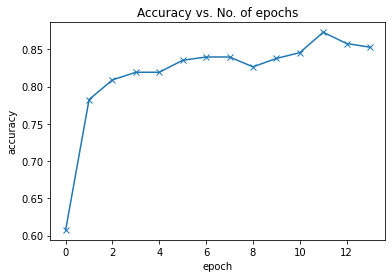

In [95]:
plot_accuracies(history)



---
### **Observation :**
---

***Our model reaches a max accuracy of around 87.30% upto 12th Epoch***

---



### **Plot of training and validation losses to study the trend**

---



In [33]:
def plot_losses(history):
    train_losses = [x.get('Train_loss') for x in history]
    val_losses = [x['Test_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Testing'])
    plt.title('Loss vs. No. of epochs');

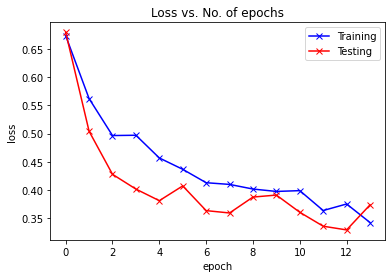

In [96]:
plot_losses(history)


### **Testing with individual images**

---



In [97]:
test_transforms = transforms.Compose(
    [transforms.Resize([32,32]),
    transforms.ToTensor(), transforms.Normalize(*stats)])
test_ds = ImageFolder(dataset_path+'/test', test_transforms)
test_dl = torch.utils.data.DataLoader(test_ds)

In [98]:
print("Size of Unseen images set : ",len(test_ds))

Size of Unseen images set :  10


In [37]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return train_ds.classes[preds[0].item()]

Label: Melanoma Skin Cancer Nevi and Moles , Predicted: Melanoma Skin Cancer Nevi and Moles


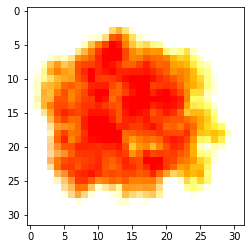

In [99]:
img, label = test_ds[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Melanoma Skin Cancer Nevi and Moles , Predicted: Melanoma Skin Cancer Nevi and Moles


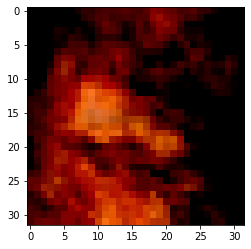

In [100]:
img, label = test_ds[1]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Melanoma Skin Cancer Nevi and Moles , Predicted: Psoriasis


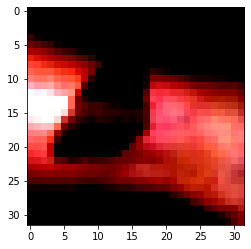

In [101]:
img, label = test_ds[2]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Melanoma Skin Cancer Nevi and Moles , Predicted: Melanoma Skin Cancer Nevi and Moles


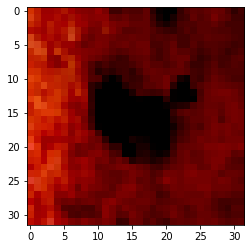

In [102]:
img, label = test_ds[3]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Melanoma Skin Cancer Nevi and Moles , Predicted: Melanoma Skin Cancer Nevi and Moles


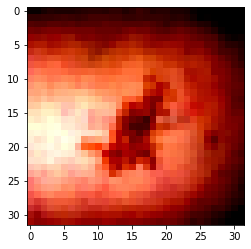

In [103]:
img, label = test_ds[4]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Psoriasis , Predicted: Psoriasis


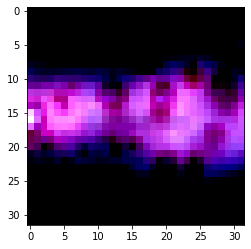

In [104]:
img, label = test_ds[5]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Psoriasis , Predicted: Psoriasis


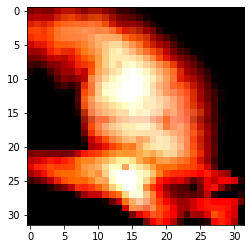

In [105]:
img, label = test_ds[6]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Psoriasis , Predicted: Psoriasis


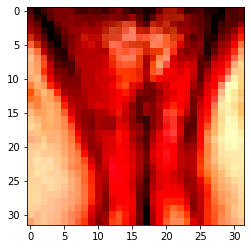

In [106]:
img, label = test_ds[7]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Psoriasis , Predicted: Psoriasis


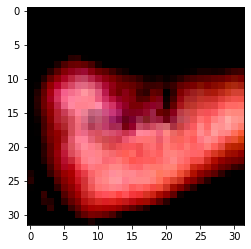

In [107]:
img, label = test_ds[8]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: Psoriasis , Predicted: Psoriasis


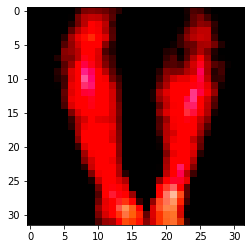

In [108]:
img, label = test_ds[9]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))